# ML-Prediction ANN


In [8]:
import pandas as pd
import numpy as np
import os
import json
import seaborn as sns

from collections import Counter
# Tansorflow for building an Artificial neural network with multiple predictor variables
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l1

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
import sys
sys.path.insert(0, os.path.abspath('../utils/')) #point this to the where util is relatively to your working directory
from util import *

data_dir = get_path_to_data_dir()
plot_dir = get_path_to_plot_dir()
model_dir = get_path_to_model_dir()

print(data_dir) #check that it's correct

/Users/skwire/Documents/datatonic-challenge/data/


In [3]:
#loading the data from the pickled file
movie_data = pd.read_pickle(data_dir + 'pre-processed/movie_encoded_only_numeric.pkl')

In [4]:
movie_data

,budget,id,revenue,runtime,vote_average,vote_count,release_date,lead_male,lead_female,lead2_male,...,Yasiin Bey,Yul Vazquez,Zac Efron,Zach Galifianakis,Zachary Woodlee,Zak Penn,Zeljko Ivanek,Zhang Ziyi,Zoe Saldana,Zooey Deschanel
0,105000000,64682,351040419,143.0,7.3,3769,130,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,150000000,9543,335154643,116.0,6.2,2317,139,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,140000000,5174,258022233,91.0,6.1,783,220,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,145000000,1735,401128639,112.0,5.2,1387,183,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,15000000,315011,77000000,120.0,6.5,143,211,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3069,14000000,33693,76901,85.0,6.3,8,263,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3070,12000,692,6000000,93.0,6.2,110,72,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3071,20000,36095,99000,111.0,7.4,63,310,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3072,7000,14337,424760,77.0,6.9,658,282,1,0,1,...,0,0,0,0,0,0,0,0,0,0


### Normalise the data
The initial data.describe() for `'budget', 'revenue', 'runtime', 'release_date'` shows the extreme jump from the 75% confidence interval to the maximum value.  Even with the removal of the z values exceeding 3 stds, budget requires transformation.

In [5]:
movie_data.describe()

,budget,id,revenue,runtime,vote_average,vote_count,release_date,lead_male,lead_female,lead2_male,...,Yasiin Bey,Yul Vazquez,Zac Efron,Zach Galifianakis,Zachary Woodlee,Zak Penn,Zeljko Ivanek,Zhang Ziyi,Zoe Saldana,Zooey Deschanel
count,3.074000e+03,3074.000000,3.074000e+03,3074.000000,3074.000000,3074.000000,3074.000000,3074.000000,3074.000000,3074.000000,...,3074.000000,3074.000000,3074.000000,3074.000000,3074.000000,3074.000000,3074.000000,3074.000000,3074.000000,3074.000000
mean,3.259586e+07,41792.111256,8.242613e+07,108.210800,6.263598,677.125895,196.303188,0.729993,0.241054,0.559206,...,0.002602,0.002277,0.003578,0.003904,0.001952,0.000325,0.005205,0.002602,0.004229,0.005205
std,3.113976e+07,68580.591865,9.774348e+07,17.540594,0.845238,777.354549,103.155056,0.444035,0.427793,0.496563,...,0.050956,0.047673,0.059722,0.062368,0.044144,0.018036,0.071969,0.050956,0.064904,0.071969
min,1.000000e+00,5.000000,5.000000e+00,41.000000,2.600000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000e+07,6197.750000,1.372544e+07,95.000000,5.800000,149.000000,106.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.200000e+07,11459.500000,4.431807e+07,105.000000,6.300000,389.000000,210.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.700000e+07,43606.250000,1.152580e+08,119.000000,6.900000,893.750000,278.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.500000e+08,321258.000000,5.637493e+08,174.000000,8.500000,4391.000000,365.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Normalising function

In [6]:
def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y

In [7]:
movie_data_x = normalize(movie_data['budget'])
movie_data_x.describe()

count    3074.000000
mean        0.217306
std         0.207598
min         0.000000
25%         0.066667
50%         0.146667
75%         0.313333
max         1.000000
Name: budget, dtype: float64

After normalization, the data is just as skewed as before. If the goal is simply to convert the data to points between 0 and 1, normalization is the way to go. Instead, I am going to use normalization in conjunction with other functions.

##### Sigmoid Function

In [8]:
def sigmoid(x):
    e = np.exp(1)
    y = 1/(1+e**(-x))
    return y

In [9]:
movie_data_x = sigmoid(movie_data['budget'])
movie_data_x.describe()

count    3074.000000
mean        0.999906
std         0.004861
min         0.731059
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: budget, dtype: float64

Here, the 25, 50th and 75th percentile is exactly the same as the 100th percentile, but in the original data, the 75th percentile more than  away from the 100th percentile, not remotely close to other quartiles. In this case, the data has been distorted.

##### Log function

In [10]:
movie_data_x = np.log(movie_data['budget'] + 1)
movie_data_x.describe()

count    3074.000000
mean       16.662791
std         1.608197
min         0.693147
25%        16.118096
50%        16.906553
75%        17.665658
max        18.826146
Name: budget, dtype: float64

The `log()` function also distorts the data, as the 25% LQ range from 1 to 16 whereas the maximum transformed value of `budget` is 18.

#### Cubic transformation

In [11]:
movie_data_x = movie_data.budget**(1/3)
movie_data_x.describe()

count    3074.000000
mean      284.953754
std       105.227806
min         1.000000
25%       215.443469
50%       280.203933
75%       360.882608
max       531.329285
Name: budget, dtype: float64

The data looks good here. The new range is from 1 to 531, and the quartiles are reflective of the original data. Now I will normalise these results.

In [12]:
def feature_scaling(column, df):
    cube_root = df[column]**(1/3)
    cube_norm = normalize(cube_root)
    df[column+"_cube_norm"] = cube_norm
    
    return df

columns_to_scale = ['budget', 'revenue', 'runtime', 'release_date']
for column in columns_to_scale:
    movie_data = feature_scaling(column, movie_data)
movie_data.drop(columns='revenue', axis=1)

,budget,id,runtime,vote_average,vote_count,release_date,lead_male,lead_female,lead2_male,lead2_female,...,Zachary Woodlee,Zak Penn,Zeljko Ivanek,Zhang Ziyi,Zoe Saldana,Zooey Deschanel,budget_cube_norm,revenue_cube_norm,runtime_cube_norm,release_date_cube_norm
0,105000000,64682,143.0,7.3,3769,130,1,0,1,0,...,0,0,0,0,0,0,0.887693,0.853630,0.834416,0.661474
1,150000000,9543,116.0,6.2,2317,139,1,0,0,1,...,0,0,0,0,0,0,1.000000,0.840522,0.669359,0.680071
2,140000000,5174,91.0,6.1,783,220,1,0,1,0,...,0,0,0,0,0,0,0.977222,0.770174,0.491777,0.819451
3,145000000,1735,112.0,5.2,1387,183,1,0,1,0,...,0,0,0,0,0,0,0.988742,0.892533,0.642789,0.760979
4,15000000,315011,120.0,6.5,143,211,1,0,1,0,...,0,0,0,0,0,0,0.463148,0.513987,0.695324,0.805871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3069,14000000,33693,85.0,6.3,8,263,0,0,0,0,...,0,0,0,0,0,0,0.452576,0.049510,0.444408,0.879671
3070,12000,692,93.0,6.2,110,72,1,0,0,0,...,0,0,0,0,0,0,0.041284,0.218348,0.507103,0.514135
3071,20000,36095,111.0,7.4,63,310,1,0,1,0,...,0,0,0,0,0,0,0.049298,0.054041,0.636048,0.938393
3072,7000,14337,77.0,6.9,658,282,1,0,1,0,...,0,0,0,0,0,0,0.034185,0.089110,0.377645,0.904191


Here if we scroll to the left then we can see that these norm variables have been produced.

 This looks very reasonable. The cube function plus normalization is an excellent way to transform skewed data if the results can still be skewed.

### Using budget,  runtime, vote_average, vote_count and release_date to predict revenue
In a regression problem, we aim to predict the output of a continuous value, in this case, the revenue generated by movies.

We use the parameters:
- budget
- release date — split up into year and day of the year
- runtime

In [13]:
from sklearn.model_selection import train_test_split as sk_train_test_split

movie_data_train, movie_data_test = sk_train_test_split(movie_data, test_size = 0.1)

In [14]:
movie_data_train.reset_index().drop(columns='index', axis=1)

,budget,id,revenue,runtime,vote_average,vote_count,release_date,lead_male,lead_female,lead2_male,...,Zachary Woodlee,Zak Penn,Zeljko Ivanek,Zhang Ziyi,Zoe Saldana,Zooey Deschanel,budget_cube_norm,revenue_cube_norm,runtime_cube_norm,release_date_cube_norm
0,65000000,71679,240159255,95.0,5.6,1600,256,0,1,0,...,0,0,0,0,0,0,0.756271,0.751925,0.522210,0.870340
1,35000000,423,120072577,150.0,8.0,1864,267,1,0,1,...,0,0,0,0,0,0,0.614913,0.596364,0.873755,0.884929
2,930000,91070,30905,100.0,5.3,66,169,0,1,0,...,0,0,0,0,0,0,0.182170,0.035993,0.559073,0.736797
3,28000000,169917,53181600,113.0,6.2,1131,261,1,0,1,...,0,0,0,0,0,0,0.570700,0.454094,0.649490,0.877022
4,32000000,13920,52277485,109.0,6.8,141,297,1,0,1,...,0,0,0,0,0,0,0.596762,0.451494,0.622444,0.922781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2761,62000000,12138,18720175,125.0,5.8,178,54,1,0,1,...,0,0,0,0,0,0,0.744423,0.320014,0.726983,0.452246
2762,25000000,168705,2405420,95.0,3.5,118,295,0,1,1,...,0,0,0,0,0,0,0.549473,0.160456,0.522210,0.920339
2763,160000,1779,6706368,91.0,7.4,90,244,1,0,0,...,0,0,0,0,0,0,0.100482,0.226679,0.491777,0.853940
2764,85000000,9408,149044513,85.0,5.9,601,159,1,0,1,...,0,0,0,0,0,1,0.827190,0.641072,0.444408,0.718694


In [15]:
# Saving the x, y for model 1 for train df
movie_data_train_y = pd.Series(movie_data_train['revenue_cube_norm'].values)
movie_data_train_x_1  = movie_data_train[["vote_average","budget_cube_norm", "runtime_cube_norm", "release_date_cube_norm"]]

In [16]:
# Saving the x, y for model 1 for test df
movie_data_test_y = pd.Series(movie_data_test['revenue_cube_norm'].values)
movie_data_test_x_1  = movie_data_test[["vote_average", "budget_cube_norm", "runtime_cube_norm", "release_date_cube_norm"]]


#### Inspect the data
Have a quick look at the joint distribution of a few pairs of columns from the training set.

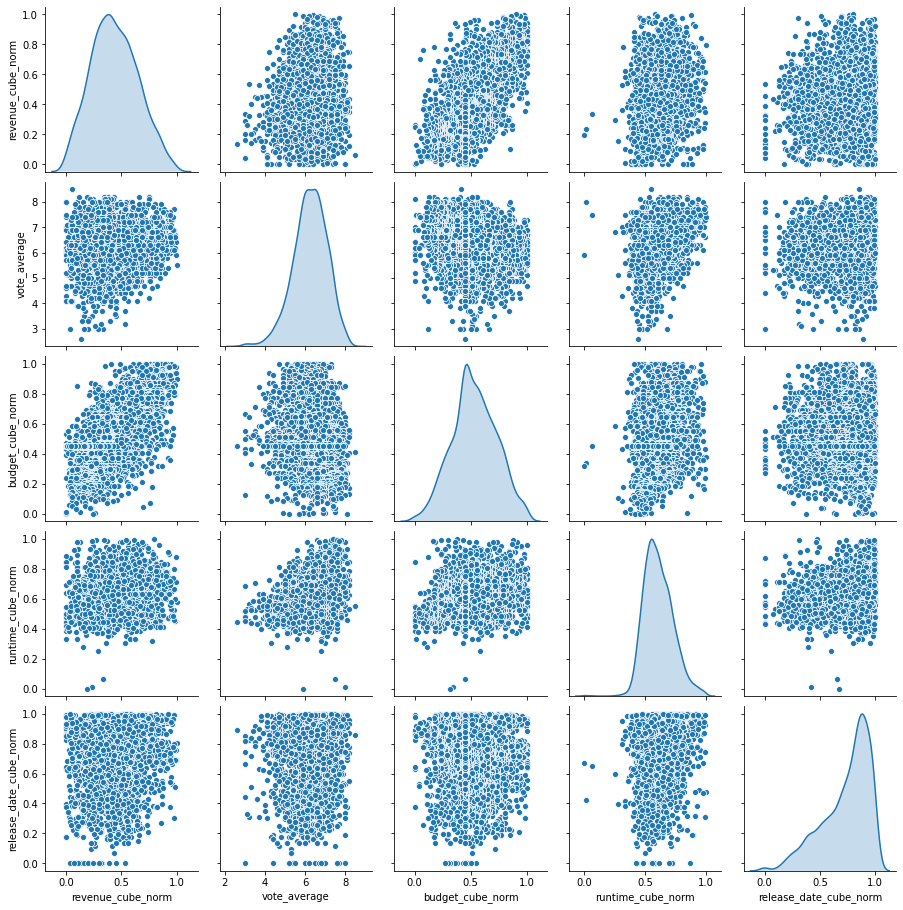

In [17]:
#sns_plot_1 = sns.pairplot(movie_data[["revenue_cube_norm", "vote_average", "budget_cube_norm", "runtime_cube_norm", "release_date_cube_norm"]], diag_kind="kde")
#sns_plot_1.savefig(plot_dir+"sns_plot_revenue_budget_runtime_release_date_revenue.png")

In [18]:
def y_train_data_description(y):
    y_stats = y.describe()
    y_stats = y_stats.transpose()
    return y_stats

In [19]:
movie_data_y_desc = y_train_data_description(movie_data_train_y)
movie_data_y_desc

count    2766.000000
mean        0.442514
std         0.209298
min         0.000000
25%         0.289164
50%         0.431033
75%         0.588611
max         1.000000
dtype: float64

#### Describing the data
We define a few functions to show us the distribution of the variables we will introduce into the model

In [20]:
def x_train_data_description(x):
    x_stats = x.describe()
    x_stats = x_stats.transpose()
    return x_stats

In [21]:
movie_data_x_desc = x_train_data_description(movie_data_train_x_1)
movie_data_x_desc

,count,mean,std,min,25%,50%,75%,max
vote_average,2766.0,6.262003,0.848139,2.600000,5.800000,6.300000,6.900000,8.500000
budget_cube_norm,2766.0,0.536354,0.197603,0.000000,0.408887,0.534360,0.678602,1.000000
runtime_cube_norm,2766.0,0.610055,0.117902,0.013028,0.522210,0.594727,0.688888,1.000000
release_date_cube_norm,2766.0,0.741068,0.210947,0.000000,0.607269,0.807399,0.902612,0.998937


In [22]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[len(movie_data_train_x_1.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [23]:
model = build_model()

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,545
Trainable params: 4,545
Non-trainable params: 0
_________________________________________________________________


In [25]:
example_batch = movie_data_train_x_1[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.9438089],
       [-1.327276 ],
       [-0.8625996],
       [-1.0318639],
       [-1.132962 ],
       [-1.1068361],
       [-0.8826919],
       [-1.0827985],
       [-1.1528339],
       [-0.9069294]], dtype=float32)

In [37]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print(''),
        print('.', end='')

EPOCHS = 1000

#history = model.fit(
#    movie_data_train_x_1, movie_data_train_y,
#    epochs=EPOCHS, validation_split = 0.2, verbose=0,
#    callbacks=[PrintDot()])

In [34]:
#tf.keras.models.save_model(
#    model, './trained-models/ANN1.model', overwrite=True, include_optimizer=True, save_format=None,
#    signatures=None, options=None
#)
#hist = pd.DataFrame(history.history)
#hist.to_pickle('./trained-models/hist_ANN1.pkl')
#epoch = pd.DataFrame(history.epoch)
#epoch.to_pickle('./trained-models/epoch_ANN1.pkl')

In [38]:
model = tf.keras.models.load_model(
    './trained-models/ANN1.model', custom_objects=None, compile=True
)
hist_df = pd.read_pickle('./trained-models/hist_ANN1.pkl')
epoch_df = pd.read_pickle('./trained-models/epoch_ANN1.pkl')

         loss       mae       mse  val_loss   val_mae   val_mse  epoch
0    0.095938  0.208958  0.095938  0.080956  0.240192  0.080956      0
1    0.036358  0.152669  0.036358  0.058179  0.199051  0.058179      1
2    0.033569  0.146183  0.033569  0.050503  0.184104  0.050503      2
3    0.031441  0.140965  0.031441  0.047777  0.180557  0.047777      3
4    0.032125  0.143388  0.032125  0.025076  0.124580  0.025076      4
..        ...       ...       ...       ...       ...       ...    ...
995  0.021488  0.115096  0.021488  0.024549  0.123412  0.024549    995
996  0.021682  0.115340  0.021682  0.024618  0.122038  0.024618    996
997  0.021723  0.115648  0.021723  0.024438  0.122736  0.024438    997
998  0.021703  0.115059  0.021703  0.027370  0.129763  0.027370    998
999  0.021811  0.115597  0.021811  0.024098  0.122150  0.024098    999

[1000 rows x 7 columns]


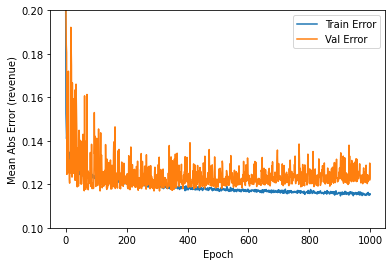

In [40]:
import matplotlib.pyplot as plt

def plot_history(hist_df, model_num, ylim):
    hist_df['epoch'] = epoch_df
    print(hist_df)
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error (revenue)')
    plt.plot(hist_df['epoch'], hist_df['mae'],
           label='Train Error')
    plt.plot(hist_df['epoch'], hist_df['val_mae'],
           label = 'Val Error')
    plt.legend()
    plt.ylim(ylim)
    plt.savefig(plot_dir+"ANN"+model_num+"_history.png", format="PNG")


plot_history(hist_df, "1", [0.1,0.20])

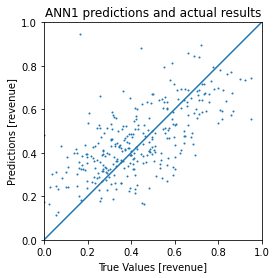

In [41]:
test_predictions = model.predict(movie_data_test_x_1).flatten()
ANN1_prediction = pd.DataFrame(test_predictions, columns=['predictions']).to_pickle(data_dir+'prediction_ANN1.pkl')

a = plt.axes(aspect='equal')
plt.scatter(movie_data_test_y, test_predictions,s=1)
plt.title('ANN1 predictions and actual results')
plt.xlabel('True Values [revenue]')
plt.ylabel('Predictions [revenue]')
ylims = [0, 1]
xlims = [0, 1]
plt.xlim(xlims)
plt.ylim(ylims)
_ = plt.plot(xlims, ylims)
plt.savefig(plot_dir+"ANN1_pred_true_scatter.png", format="PNG")

In [42]:
movie_data_y_true = movie_data_test_y.reset_index(drop=True)
movie_data_y_true

0      0.406359
1      0.494806
2      0.288031
3      0.734633
4      0.272210
         ...   
303    0.564693
304    0.270460
305    0.372234
306    0.781903
307    0.410909
Length: 308, dtype: float64

In [43]:
y_predictions = pd.read_pickle(data_dir+'prediction_ANN1.pkl')
ANN1_pred = y_predictions['predictions']
ANN1_pred

0      0.472742
1      0.462160
2      0.513092
3      0.718687
4      0.414941
         ...   
303    0.604685
304    0.407557
305    0.466910
306    0.694474
307    0.371456
Name: predictions, Length: 308, dtype: float32

In [44]:
from sklearn.metrics import r2_score
ANN1_r2 = r2_score(movie_data_y_true, ANN1_pred)
ANN1_r2

0.3930985436047212

The r^2 value is 0.46, meaning that 46% of the variation in the revenue of the movies is explained the parameters in model 1.

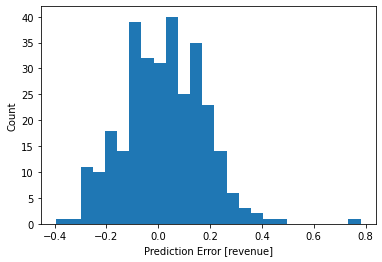

In [45]:
error = ANN1_pred - movie_data_y_true
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [revenue]")
_ = plt.ylabel("Count")
plt.savefig(plot_dir+"ANN1_error_dist.png", format="PNG")

In [46]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(movie_data_y_true, ANN1_pred)

0.12609650492588725

### Model 2 - including OHE parameters
The following model includes information about:
- budget
- a list of film genres
- release date — split up into year and day of the year
- a list of spoken languages
- runtime
- a list of production companies
- a list of cast members
- a list of crew members
- keywords


In [47]:
pd.set_option('display.max_columns', 2200)
movie_data_train.head()

budget      id    revenue  runtime  vote_average  vote_count  \
449   65000000   71679  240159255     95.0           5.6        1600   
1073  35000000     423  120072577    150.0           8.0        1864   
2974    930000   91070      30905    100.0           5.3          66   
1374  28000000  169917   53181600    113.0           6.2        1131   
1056  32000000   13920   52277485    109.0           6.8         141   

      release_date  lead_male  lead_female  lead2_male  lead2_female  Action  \
449            256          0            1           0             1       1   
1073           267          1            0           1             0       0   
2974           169          0            1           0             1       0   
1374           261          1            0           1             0       0   
1056           297          1            0           1             0       0   

      Adventure  Animation  Comedy  Crime  Documentary  Drama  Family  \
449           0          0       0      0            0      0       0   
1073          0          0       0      0            0      1       0   
2974          0          0       1      0            0      0       0   
1374          0          0       0      1            0      1       0   
1056          0          0       0      0            0      1       0   

      Fantasy  Foreign  History  Horror  Music  Mystery  Romance  \
449         0        0        0       1      0        0        0   
1073        0        0        0       0      0        0        0   
2974        0        0        0       0      0        0        0   
1374        0        0        0       0      0        1        0   
1056        0        0        0       0      0        0        0   

      Science Fiction  TV Movie  Thriller  War  Western  1960s  1970s  1980s  \
449                 1         0         0    0        0      0      0      0   
1073                0         0         0    1        0      0      0      0   
2974                0         0         0    0        0      0      0      0   
1374                0         0         1    0        0      0      0      0   
1056                0         0         0    0        0      0      0      0   

      19th century  3d  adoption  adultery  adventure  aftercreditsstinger  \
449              0   0         0         0          0                    0   
1073             0   0         0         0          0                    0   
2974             0   0         0         0          0                    0   
1374             0   0         0         0          0                    0   
1056             0   0         0         0          0                    0   

      afterlife  agent  airplane  airport  alcohol  alcoholic  alcoholism  \
449           0      0         0        0        0          0           0   
1073          0      0         0        0        0          0           0   
2974          0      0         0        0        0          0           0   
1374          0      0         0        0        0          1           0   
1056          0      0         0        0        0          0           0   

      alien  alien invasion  american football  amnesia  android  animation  \
449       0               0                  0        0        0          0   
1073      0               0                  0        0        0          0   
2974      0               0                  0        0        0          0   
1374      0               0                  0        0        0          0   
1056      0               0                  0        0        0          0   

      anti hero  army  artificial intelligence  assassin  assassination  \
449           0     0                        0         0              0   
1073          0     0                        0         0              0   
2974          0     0                        0         0              0   
1374          0     0                        0         0  

In [48]:
# Saving the x, y for model 1 for train df
movie_data_train_x_2 = movie_data_train[["lead_male","lead_female","lead2_male","lead2_female","Action","Adventure","Animation","Comedy","Crime","Documentary","Drama","Family","Fantasy","Foreign","History","Horror","Music","Mystery","Romance","Science Fiction","TV Movie","Thriller","War","Western","1960s","1970s","1980s","19th century","3d","book","sequel", "vote_average","budget_cube_norm", "runtime_cube_norm", "release_date_cube_norm"]]


In [49]:
# Saving the x, y for model 1 for test df
movie_data_test_x_2 = movie_data_test[["lead_male","lead_female","lead2_male","lead2_female","Action","Adventure","Animation","Comedy","Crime","Documentary","Drama","Family","Fantasy","Foreign","History","Horror","Music","Mystery","Romance","Science Fiction","TV Movie","Thriller","War","Western","1960s","1970s","1980s","19th century","3d","book","sequel", "vote_average","budget_cube_norm", "runtime_cube_norm", "release_date_cube_norm"]]


In [50]:
movie_data_x2_desc = x_train_data_description(movie_data_train_x_2)
movie_data_x2_desc

,count,mean,std,min,25%,50%,75%,max
lead_male,2766.0,0.733189,0.442373,0.000000,0.000000,1.000000,1.000000,1.000000
lead_female,2766.0,0.240419,0.427415,0.000000,0.000000,0.000000,0.000000,1.000000
lead2_male,2766.0,0.562184,0.496208,0.000000,0.000000,1.000000,1.000000,1.000000
lead2_female,2766.0,0.383225,0.486260,0.000000,0.000000,0.000000,1.000000,1.000000
Action,2766.0,0.263557,0.440642,0.000000,0.000000,0.000000,1.000000,1.000000
Adventure,2766.0,0.171728,0.377212,0.000000,0.000000,0.000000,0.000000,1.000000
Animation,2766.0,0.048807,0.215503,0.000000,0.000000,0.000000,0.000000,1.000000
Comedy,2766.0,0.364787,0.481457,0.000000,0.000000,0.000000,1.000000,1.000000
Crime,2766.0,0.167751,0.373713,0.000000,0.000000,0.000000,0.000000,1.000000
Documentary,2766.0,0.014461,0.119404,0.000000,0.000000,0.000000,0.000000,1.000000


In [51]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[len(movie_data_train_x_2.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [52]:
model = build_model()

In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                2304      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 6,529
Trainable params: 6,529
Non-trainable params: 0
_________________________________________________________________


In [54]:
example_batch = movie_data_train_x_2[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.2339557 ],
       [-0.09091561],
       [ 0.33207765],
       [ 0.19071443],
       [ 0.08936476],
       [ 0.06257227],
       [ 0.19426432],
       [ 0.22937305],
       [ 0.14760545],
       [ 0.22401902]], dtype=float32)

In [57]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print(''),
        print('.', end='')


# The patience parameter is the amount of epochs to check for improvement.
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

EPOCHS = 1000

#history = model.fit(
#    movie_data_train_x_2, movie_data_train_y,
#    epochs=EPOCHS, validation_split = 0.2, verbose=0,
#    callbacks=[PrintDot(), early_stop])


..................................................

In [58]:
#tf.keras.models.save_model(
#    model, './trained-models/ANN2.model', overwrite=True, include_optimizer=True, save_format=None,
#    signatures=None, options=None
#)
#hist = pd.DataFrame(history.history)
#hist.to_pickle('./trained-models/hist_ANN2.pkl')
#epoch = pd.DataFrame(history.epoch)
#epoch.to_pickle('./trained-models/epoch_ANN2.pkl')

INFO:tensorflow:Assets written to: ./trained-models/ANN2.model/assets


In [63]:
model = tf.keras.models.load_model(
    './trained-models/ANN2.model', custom_objects=None, compile=True
)
hist_df_2 = pd.read_pickle('./trained-models/hist_ANN2.pkl')
epoch_df = pd.read_pickle('./trained-models/epoch_ANN2.pkl')

        loss       mae       mse  val_loss   val_mae   val_mse  epoch
0   0.043171  0.164877  0.043171  0.035868  0.151279  0.035868      0
1   0.033831  0.148221  0.033831  0.041451  0.166522  0.041451      1
2   0.032469  0.144601  0.032469  0.025061  0.126838  0.025061      2
3   0.028670  0.134953  0.028670  0.026116  0.130424  0.026116      3
4   0.028611  0.134286  0.028611  0.024255  0.122136  0.024255      4
5   0.026810  0.131348  0.026810  0.024692  0.123865  0.024692      5
6   0.026680  0.130061  0.026680  0.036658  0.157233  0.036658      6
7   0.025573  0.126316  0.025573  0.024118  0.121686  0.024118      7
8   0.025438  0.126979  0.025438  0.021935  0.116264  0.021935      8
9   0.024197  0.122912  0.024197  0.027790  0.131843  0.027790      9
10  0.023865  0.122489  0.023865  0.054441  0.196142  0.054441     10
11  0.023847  0.121542  0.023847  0.076397  0.239687  0.076397     11
12  0.023821  0.120632  0.023821  0.022075  0.117232  0.022075     12
13  0.022950  0.1183

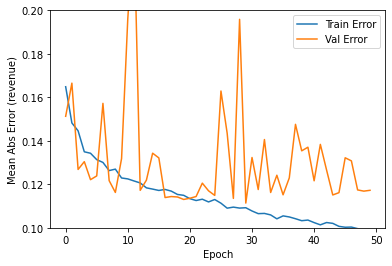

In [61]:
import matplotlib.pyplot as plt


plot_history(hist_df_2, "2", [0.1,0.20])

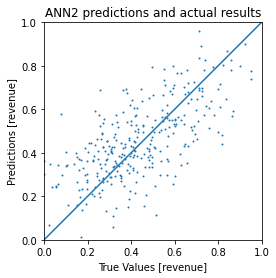

In [64]:
test_predictions_2 = model.predict(movie_data_test_x_2).flatten()
ANN2_prediction = pd.DataFrame(test_predictions_2, columns=['predictions']).to_pickle(data_dir+'prediction_ANN2.pkl')

a = plt.axes(aspect='equal')
plt.scatter(movie_data_test_y, test_predictions_2,s=1)
plt.title('ANN2 predictions and actual results')
plt.xlabel('True Values [revenue]')
plt.ylabel('Predictions [revenue]')
ylims = [0, 1]
xlims = [0, 1]
plt.xlim(xlims)
plt.ylim(ylims)
_ = plt.plot(xlims, ylims)
plt.savefig(plot_dir+"ANN2_pred_true_scatter.png", format="PNG")

In [65]:
movie_data_test_y

0      0.406359
1      0.494806
2      0.288031
3      0.734633
4      0.272210
         ...   
303    0.564693
304    0.270460
305    0.372234
306    0.781903
307    0.410909
Length: 308, dtype: float64

In [66]:
y_predictions = pd.read_pickle(data_dir+"/prediction_ANN2.pkl")
ANN2_pred = y_predictions['predictions']
ANN2_pred

0      0.641080
1      0.355386
2      0.455834
3      0.780117
4      0.537201
         ...   
303    0.583354
304    0.427541
305    0.441144
306    0.572689
307    0.322931
Name: predictions, Length: 308, dtype: float32

In [67]:
from sklearn.metrics import r2_score
ANN1_r2 = r2_score(movie_data_y_true, ANN2_pred)
ANN1_r2

0.38468285041320904

The r^2 value is 0.54, meaning that 54% of the variation in the revenue of the movies is explained the parameters in model 1.

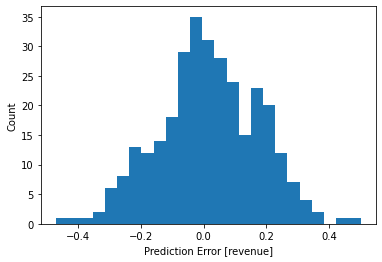

In [68]:
error = ANN2_pred - movie_data_y_true
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [revenue]")
_ = plt.ylabel("Count")
plt.savefig(plot_dir+"ANN2_error_dist.png", format="PNG")

In [69]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(movie_data_y_true, ANN2_pred)

0.1271520742110305